In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

2024-02-01 10:02:43.847706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:02:43.848638: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:02:43.849096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
		 metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
validation_data=(val_seq, val_target),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2024-02-01 10:07:22.345725: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-01 10:07:22.416172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:07:22.416678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:07:22.417385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

312/313 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5677

2024-02-01 10:07:25.888195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:07:25.888937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:07:25.889424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 4s 10ms/step - loss: 0.6913 - accuracy: 0.5676 - val_loss: 0.6893 - val_accuracy: 0.6108
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6828 - accuracy: 0.6574 - val_loss: 0.6725 - val_accuracy: 0.6966
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6343 - accuracy: 0.7071 - val_loss: 0.5985 - val_accuracy: 0.7146
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5791 - accuracy: 0.7292 - val_loss: 0.5678 - val_accuracy: 0.7290
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5493 - accuracy: 0.7442 - val_loss: 0.5429 - val_accuracy: 0.7454
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5233 - accuracy: 0.7617 - val_loss: 0.5201 - val_accuracy: 0.7532
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5019 - accuracy: 0.7758 - val_loss: 0.5034 - val_accuracy: 0.7684
Epoc

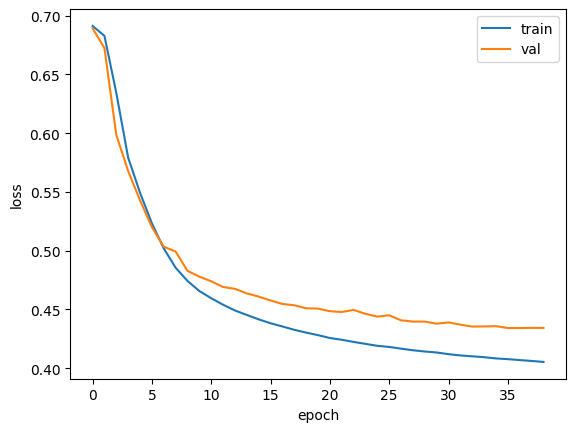

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

2024-02-01 10:13:23.773075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:13:23.773830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:13:23.774236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
		 metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
							 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
validation_data=(val_seq, val_target),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2024-02-01 10:13:39.905607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:13:39.906164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:13:39.906922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

312/313 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5566

2024-02-01 10:13:43.666726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:13:43.667182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:13:43.667781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 4s 11ms/step - loss: 0.6921 - accuracy: 0.5566 - val_loss: 0.6911 - val_accuracy: 0.5986
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6890 - accuracy: 0.6191 - val_loss: 0.6859 - val_accuracy: 0.6508
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6759 - accuracy: 0.6682 - val_loss: 0.6574 - val_accuracy: 0.6804
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6107 - accuracy: 0.7090 - val_loss: 0.5878 - val_accuracy: 0.7160
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5738 - accuracy: 0.7278 - val_loss: 0.5635 - val_accuracy: 0.7364
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5544 - accuracy: 0.7406 - val_loss: 0.5444 - val_accuracy: 0.7546
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5364 - accuracy: 0.7526 - val_loss: 0.5280 - val_accuracy: 0.7614
Epoc

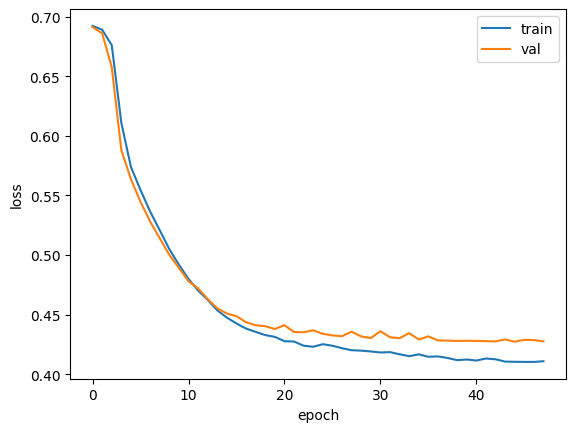

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()